## Simple Sentiment Classification with Tokenization + LSTM

This notebook does not containing anything about text cleaning, which is very important for sentiment classification. It is just a basic example of using LSTM networks on classifying text data.

To do: adding cleaning, trying different vectorizers (TF-IDF, Count...)

In [19]:
import numpy as np
import pandas as pd

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn import model_selection as ms
import sklearn.preprocessing as pp

import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Embedding,  Dropout,  SpatialDropout1D, LSTM
from tensorflow.keras import backend as K

import matplotlib.pyplot as plt

In [12]:
#load data
df = pd.read_csv('train.csv')
df.head()

,score,text
0,0,"overgeneralized, not helpful to anyone serious..."
1,1,Great sound and service.
2,1,love this book!!!: this book is a fast read ab...
3,1,A hugely enjoyable screen version of Rona Jaff...
4,0,What an uninteresting hodge-podge. It could ha...


In [15]:
#binarize labels
lb = pp.LabelBinarizer()
labels = lb.fit_transform(df.score)

In [16]:
#train-test split
X_train, X_test, y_train, y_test = ms.train_test_split(df.text, labels, test_size=0.33, random_state=42)

In [17]:
#tokenization
max_features = 5000
max_len = 200
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(X_train) #just for train

X_train = tokenizer.texts_to_sequences(X_train) #separately for train and test
X_test = tokenizer.texts_to_sequences(X_test) #separately for train and test

X_train = pad_sequences(X_train,maxlen=max_len) #separately for train and test
X_test = pad_sequences(X_test,maxlen=max_len) #separately for train and test



In [25]:
#create the LSTM model
embed_dim = 32
lstm_out = 10

model = Sequential()
model.add(Embedding(max_features, embed_dim,input_length = X_train.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(y_train.shape[1],activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy']) #use categorical_crossentropy for more than 2 classes
print(model.summary())


# fit model
batch_size = 32
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 4, batch_size=batch_size, verbose = 1)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 200, 32)           160000    
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 200, 32)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 10)                1720      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 161,731
Trainable params: 161,731
Non-trainable params: 0
_________________________________________________________________
None
Train on 5025 samples, validate on 2475 samples
Epoch 1/4
5025/5025 [==============================] - 40s 8ms/sample - loss: 0.6620 - accuracy: 0.6163 - val_loss: 0.5911 - val_accuracy: 0.7119
Epoch 2/4
5025/5025 [==========================

In [26]:
#evaluate model
model.evaluate(X_test,y_test)

2475/2475 [==============================] - 2s 884us/sample - loss: 0.4640 - accuracy: 0.7846


[0.46395358894810534, 0.78464645]

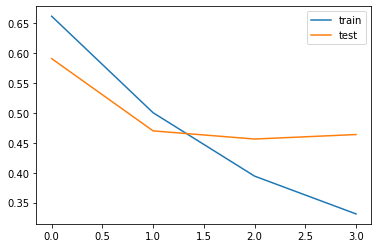

In [28]:
#loss graph
%matplotlib inline
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.legend()
plt.show()

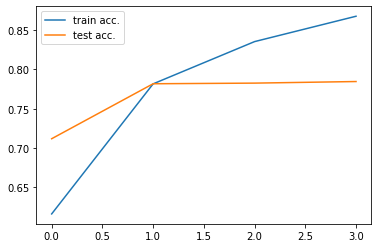

In [32]:
#accuracy graph
%matplotlib inline
plt.plot(history.history['accuracy'], label='train acc.')
plt.plot(history.history['val_accuracy'], label='test acc.')
plt.legend()
plt.show()